In [5]:
# Basic operations
import numpy as np
import pandas as pd
import ast

# LDA
from collections import Counter

# aesthetics
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [6]:
df = pd.read_pickle('dfs/preprocessed-cleaned-df.pkl')
df.head()

,prompt,professor,student,prompt_clean,professor_clean,student_clean
0,['You happen to know that Tim and Harry have r...,"That's a great question! You see, our brains a...","Professor, I was thinking about how I conclude...","['happen', 'know', 'tim', 'harry', 'recently',...","['great', 'question', 'brain', 'wire', 'look',...","['professor', 'think', 'conclude', 'roommate',..."
1,['You happen to know that Tim and Harry have r...,"Of course, you could be wrong! But here's the ...","But isn't that just an assumption? I mean, I c...","['happen', 'know', 'tim', 'harry', 'recently',...","['course', 'wrong', 'thing', 'reasoning', 'bas...","['assumption', 'mean', 'wrong', 'roommate', 'e..."
2,['You happen to know that Tim and Harry have r...,"Ah, great example! This is where the concept o...","That makes sense, I guess. But what about case...","['happen', 'know', 'tim', 'harry', 'recently',...","['great', 'example', 'concept', 'abduction', '...","['make', 'sense', 'guess', 'case', 'explanatio..."
3,['You happen to know that Tim and Harry have r...,Exactly! Our minds are wired to seek patterns ...,"Yeah, I think so. It's like, our brains are al...","['happen', 'know', 'tim', 'harry', 'recently',...","['exactly', 'mind', 'wire', 'seek', 'pattern',...","['yeah', 'think', 'like', 'brain', 'try', 'fin..."
4,['\n Even if it is true that we routinely rely...,"Well, my inquisitive student, that's a great q...","Professor Phil, do we always choose the simple...","['true', 'routinely', 'rely', 'abductive', 're...","['inquisitive', 'student', 'great', 'question'...","['professor', 'phil', 'choose', 'simple', 'exp..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   prompt           214 non-null    object
 1   professor        214 non-null    object
 2   student          214 non-null    object
 3   prompt_clean     214 non-null    object
 4   professor_clean  214 non-null    object
 5   student_clean    214 non-null    object
dtypes: object(6)
memory usage: 10.2+ KB


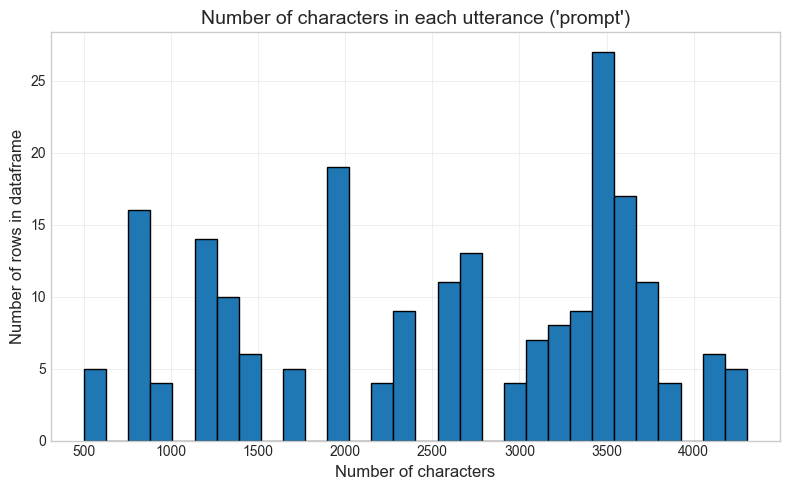

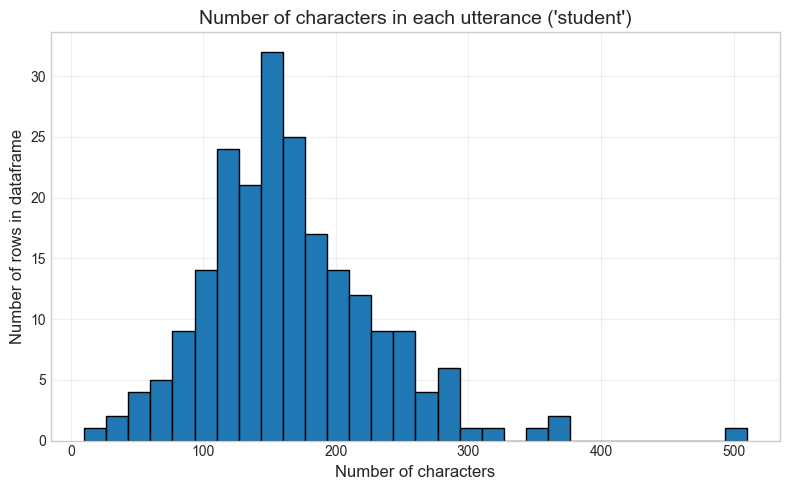

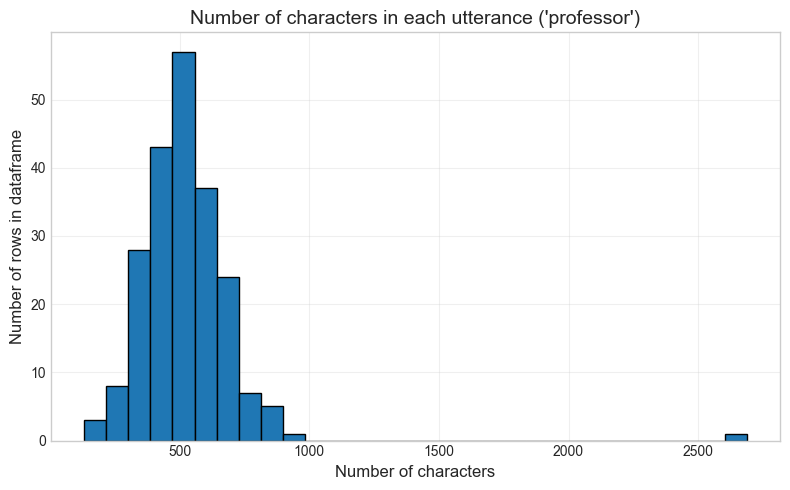

In [14]:
# number of characters in each utterance of each speaker
for column in ['prompt', 'student', 'professor']:
    plt.figure(figsize=(8, 5))
    df[column].str.len().hist(bins=30, edgecolor='black')
    plt.title(f"Number of characters in each utterance ('{column}')", fontsize=14)
    plt.xlabel("Number of characters", fontsize=12)
    plt.ylabel("Number of rows in dataframe", fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

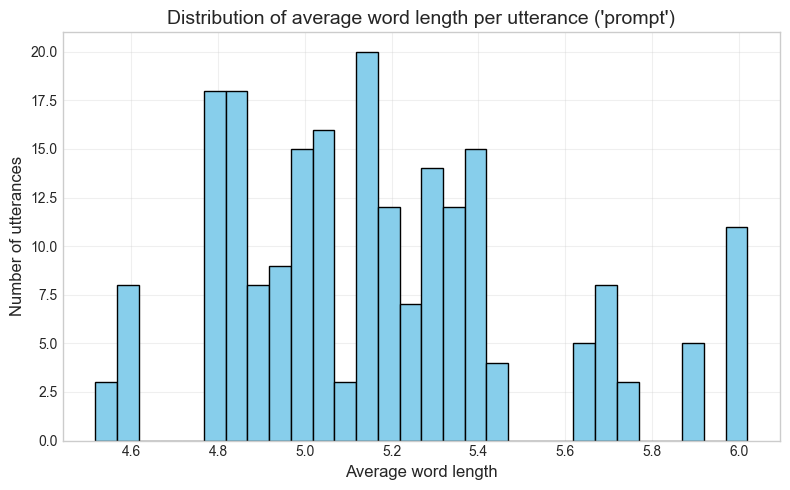

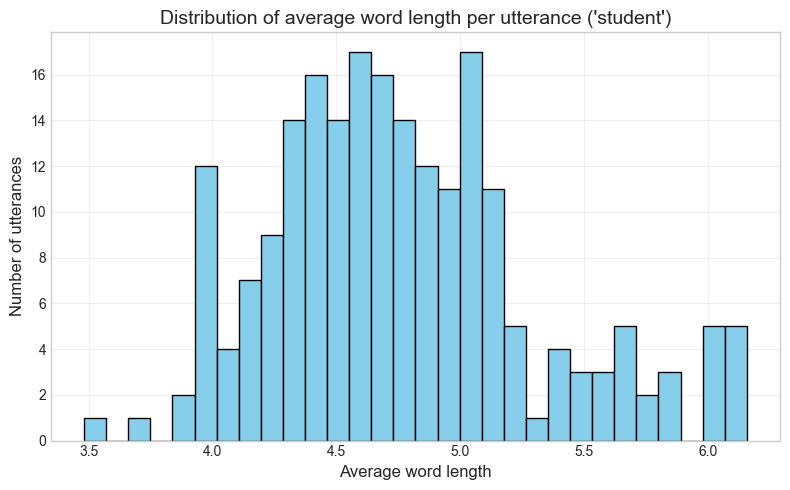

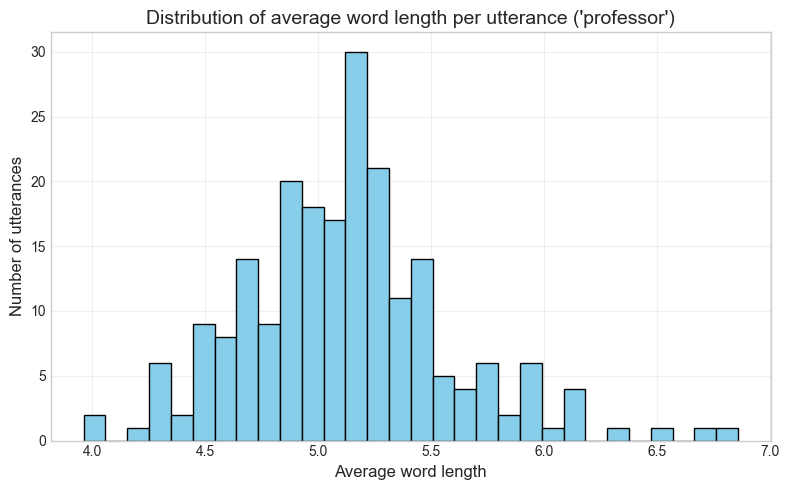

In [16]:
# distribution of average word length per utterance
plt.style.use('seaborn-v0_8-whitegrid')
for column in ['prompt', 'student', 'professor']:
    plt.figure(figsize=(8, 5))
    df[column].str.split() \
        .apply(lambda x: [len(i) for i in x]) \
        .map(np.mean) \
        .hist(bins=30, edgecolor='black', color='skyblue')

    plt.title(f"Distribution of average word length per utterance ('{column}')", fontsize=14)
    plt.xlabel("Average word length", fontsize=12)
    plt.ylabel("Number of utterances", fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

C:\Users\quiz0\AppData\Local\Temp\ipykernel_19756\1762482368.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="mako")


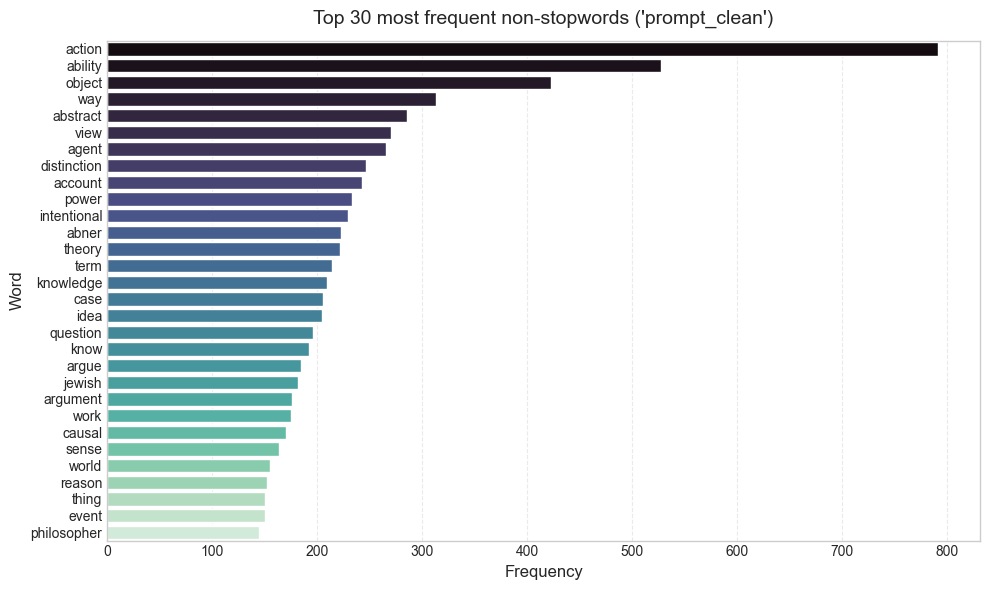

C:\Users\quiz0\AppData\Local\Temp\ipykernel_19756\1762482368.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="mako")


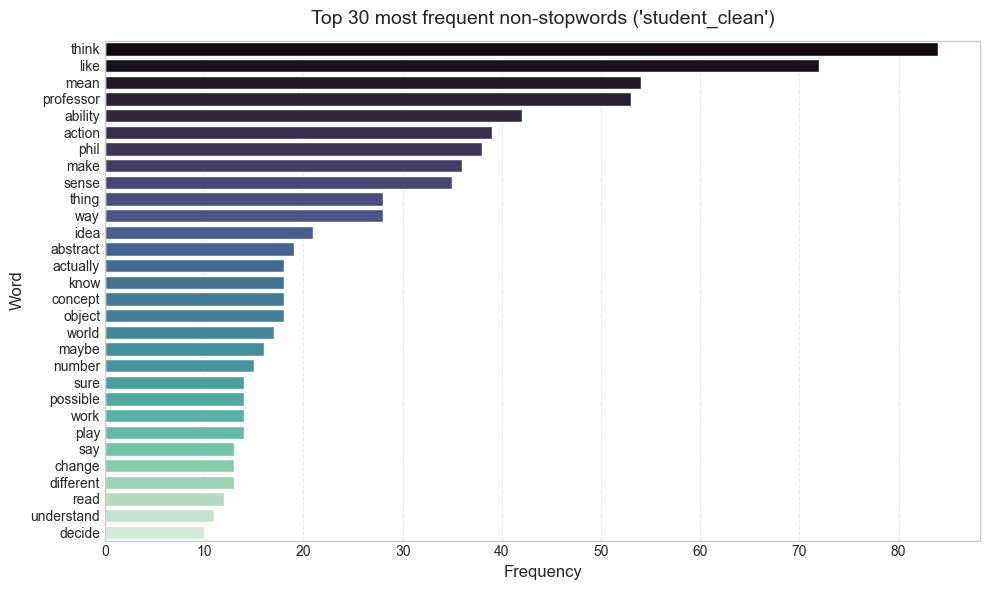

C:\Users\quiz0\AppData\Local\Temp\ipykernel_19756\1762482368.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="mako")


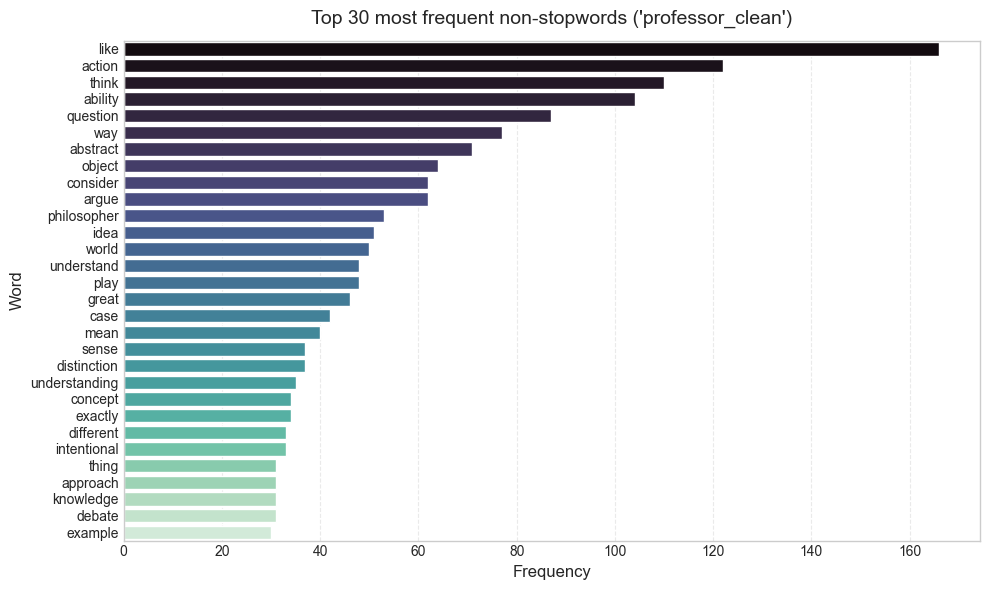

In [19]:
# The 30 most popular words
for column in ['prompt_clean', 'student_clean', 'professor_clean']:
    corpus = [word for lemmas in df[column].apply(ast.literal_eval)  for word in lemmas]
    counter=Counter(corpus)
    most=counter.most_common(30)
    words, counts = zip(*most)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words), palette="mako")
    plt.title(f"Top {30} most frequent non-stopwords ('{column}')", fontsize=14, pad=12)
    plt.xlabel("Frequency", fontsize=12)
    plt.ylabel("Word", fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()